In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [6]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')  / 255

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64,(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [11]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                    epochs = 30, batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

KeyboardInterrupt: 


Epoch 00001: val_loss improved from inf to 0.05317, saving model to ./model\01-0.0532.hdf5

Epoch 00002: val_loss improved from 0.05317 to 0.03926, saving model to ./model\02-0.0393.hdf5

Epoch 00003: val_loss improved from 0.03926 to 0.03455, saving model to ./model\03-0.0346.hdf5

Epoch 00004: val_loss improved from 0.03455 to 0.03130, saving model to ./model\04-0.0313.hdf5

Epoch 00005: val_loss did not improve from 0.03130

Epoch 00006: val_loss did not improve from 0.03130

Epoch 00007: val_loss improved from 0.03130 to 0.02842, saving model to ./model\07-0.0284.hdf5

Epoch 00008: val_loss did not improve from 0.02842

Epoch 00009: val_loss did not improve from 0.02842

Epoch 00010: val_loss improved from 0.02842 to 0.02841, saving model to ./model\10-0.0284.hdf5

Epoch 00011: val_loss did not improve from 0.02841

Epoch 00012: val_loss improved from 0.02841 to 0.02769, saving model to ./model\12-0.0277.hdf5

Epoch 00013: val_loss improved from 0.02769 to 0.02477, saving model to

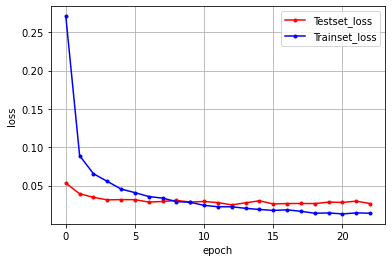

In [12]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')  / 255

Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64,(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                    epochs = 30, batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
# 코랩
!unzip data.zip

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Activation,  Dropout , Flatten , Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers,initializers,regularizers,metrics


import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


np.random.seed(3)
tf.random.set_seed(3)

#수평 대칭 이미지 50%확률로 만들어 추가
#전체크기의 10% 범위에서 좌우로 이동
#마찬가지로 위아래로 이동

train_datagen = ImageDataGenerator(rescale =1./255, horizontal_flip=True
                                   ,width_shift_range = 0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale =1./255,horizontal_flip=True
                                   ,width_shift_range = 0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    './train',
    target_size=(150,150),
    batch_size = 5,
    class_mode='binary')


test_generator = test_datagen.flow_from_directory(
    './test',
    target_size=(150,150),
    batch_size = 5,
    class_mode='binary')

#테스트 셋은 이미지 부풀리기 과정을 진행하지 않음
test_generator = test_datagen.flow_from_directory(
    './test',
    target_size=(150,150),
    batch_size = 5,
    class_mode='binary')

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (150,150,3)))   
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))


model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0002),metrics=['accuracy']) 


history = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=20,
    validation_data=test_generator,
    validation_steps=4)

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len,acc,marker=',',c="red",label="Trainset_acc")
plt.plot(x_len,val_acc,marker=',',c="lightcoral",label='Testset_acc')
plt.plot(x_len,y_vloss,marker=',',c="cornflowerblue",label='Testset_loss')
plt.plot(x_len,y_loss,marker=',',c="blue",label='Trainset_loss')

plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

NameError: name 'train_datagen' is not defined